<h1>Imports

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 22.6 MB 1.6 MB/s 0:00:13
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored

C:\Users\julie\AppData\Local\Temp\ipykernel_28256\2984081768.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


<h1> Exploration

In [3]:
df = pd.read_csv('../Data/news-article-categories.csv')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (6877, 3)


,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...


In [4]:
df.dropna(inplace=True)

In [5]:
#Displaying average length of articles
df["body"].apply(len).mean()

3774.2447613504073

<AxesSubplot: >

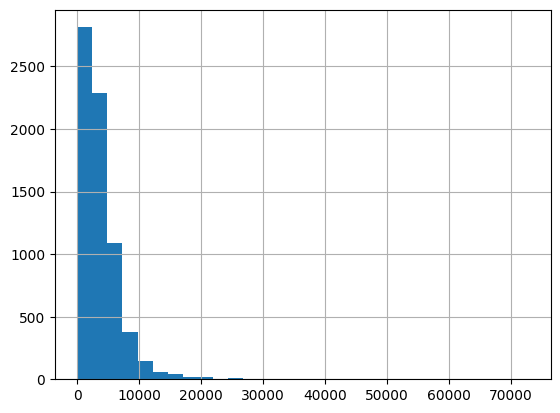

In [6]:
# Repartition of the content lengths (characters)
%matplotlib inline
df["body"].apply(len).hist(bins = 30)

In [7]:
# We check the number of article per category
df.value_counts("category")

category
ARTS & CULTURE    1001
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             376
SCIENCE            350
MEDIA              347
CRIME              300
dtype: int64

<AxesSubplot: >

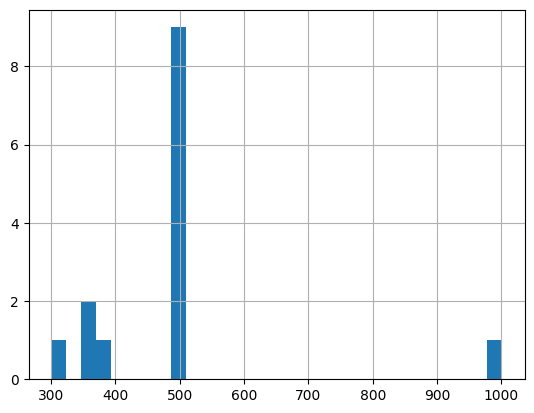

In [8]:
# And plot a histogram
df.value_counts("category").hist(bins=30)

<h1>Getting Article Length

In [9]:
df['body_len'] = df["body"].apply(lambda s: len(s.split()))
df['title_len'] = df["title"].apply(lambda s: len(s.split()))

In [10]:
df

,category,title,body,body_len,title_len
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis...",3426,10
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...,324,12
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...,331,11
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds...",288,10
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...,160,9
...,...,...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural...,I still think about that Tuesday night dinner ...,685,7
6873,WOMEN,Happy Birthday To Us,I remember the morning of my high school gradu...,1292,4
6874,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I aske...",568,4
6875,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa ...",1126,4


<h1> Profile Report

In [11]:
# Let's create an automatic and interactive report of the BBC News dataset
profile = ProfileReport(df, title="Article Profile Report", html={"style": {"full_width": True}})

In [12]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h1> Splitting the Articles

In [13]:
def flatten(lst):
  for sublist in lst:
          if isinstance(sublist, list):
              for item in sublist:
                  yield item
          else:
              yield sublist

In [14]:
arr_body = df.body.drop_duplicates().apply(lambda x: x.split(' ')).array
arr_title = df.title.drop_duplicates().apply(lambda x: x.split(' ')).array

# Now we flatten the list of lists into a single level list and put it into a set
body_dict = set(flatten(arr_body))
title_dict = set(flatten(arr_title))

# and get their length
print("Length of body dictionnary : ", len(body_dict))
print("Length of title dictionnary : ", len(title_dict))

Length of body dictionnary :  255579
Length of title dictionnary :  16197


<h1> Tokenization

In [15]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer

In [16]:
df["tok_body"] = df.body.apply(lambda x: TreebankWordTokenizer().tokenize(x))
df["tok_title"] = df.title.apply(lambda x: TreebankWordTokenizer().tokenize(x))

<h1> Zipf's Law

In [17]:
def merge_list(list_of_lists):
  merged_list = []

  for sublist in list_of_lists:
      merged_list += sublist

  return merged_list

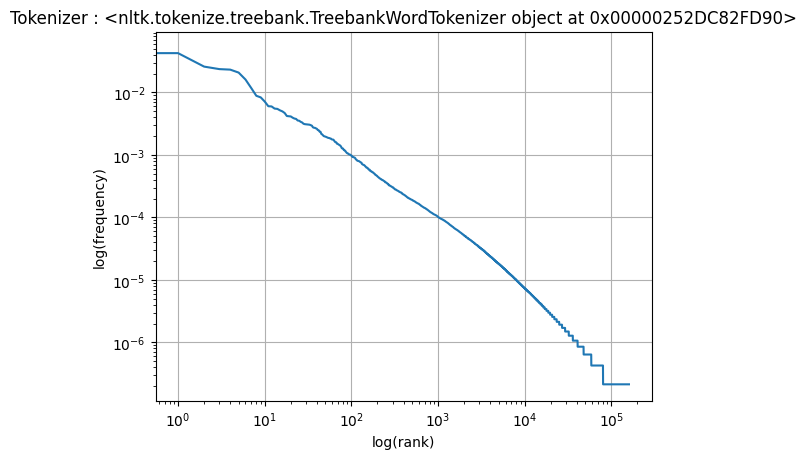

In [18]:
#Count the occurrences of each different elements in a list
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

tok = TreebankWordTokenizer()

# get the counter of words
arr = df.body.apply(lambda x: tok.tokenize(x)).array
word_list = merge_list(arr)

# example usage: a = [1, 1, 2, 5, 6, 5]; print(Counter(a))
c = Counter(word_list)

# then use the following code to plot
# Formating the counter object to a proper dataset
d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
d.columns=['word', 'occurences']
# Computing frequencies instead of occurences
nb_total = d.occurences.sum()
d['freq'] = d.occurences.apply(lambda x: x/nb_total)
# Sorting by frequency, most frequent word at the top of the df
d = d.sort_values('freq', ascending=False)
plt.figure()
plt.grid()
plt.xscale('log')  # Using log scale
plt.yscale('log')  # Using log scale
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title("Tokenizer : {0}".format(tok))
x = list(range(d.shape[0]))
plt.plot(x, d.freq)
plt.show()

<h1> Topic Modelling with Gensim

In [26]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
perso_stop = ["'s"," \" ", "--","''", "\'\'", "said", "I\'m", "n\'t", "\"I", "don\'t","would", "\'re", "\'\'", "told", "you\'re", "could", "told.", "also", "even", "many" ]
to_be_removed = list(en_stop) + list(punctuation) + perso_stop

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
text_data = list(df.body.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)
# print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=14)

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

c:\Users\julie\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
